In [5]:
####################################################
## 1.0 Simplest genetic Algorith Model
####################################################

import numpy as np
import pandas as pd



data = {
    'Label': ['A', 'B', 'C', 'D'],
    'X1': [2, 2, 5, 6],
    'X2': [2, 3, 7, 6],
    'Y': [-10, -7, 11, 10]
}

df = pd.DataFrame(data)
print(df)


  Label  X1  X2   Y
0     A   2   2 -10
1     B   2   3  -7
2     C   5   7  11
3     D   6   6  10


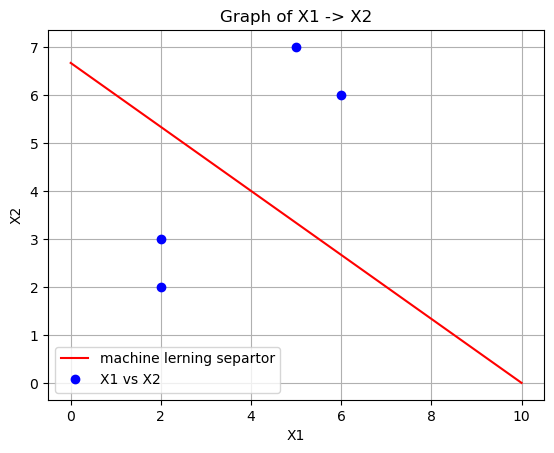

In [22]:
import matplotlib.pyplot as plt

# line separating the the two outcomes
x = np.linspace(0, 10, 100)  # Range of x values from -10 to 10

def simple_gen_alg(x):
    return ((2)/(3)) * -x+((20)/(3))

# Compute y values using the function
y = simple_gen_alg(x)
# Plot LIne
plt.plot(x, y, color='red', label='machine lerning separtor')
#Plot dots
plt.plot(df["X1"], df["X2"], marker='o', color='b', linestyle='none', label='X1 vs X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Graph of X1 -> X2')
plt.legend()
plt.grid(True)
plt.show()

# The objective of the model is find this redline in a multi variable case (database)



In [ ]:
####################################################
## 2.0 Simplest genetic Algorith Model
####################################################
